# Activity 3: How to Build a Sunflower 🌻 

___

In this activity, you will learn how to code the intricate, beautiful packing of florets in a sunflower head, explore the sensitivity of the arrangement of florets to the golden angle, and create animations of a growing sunflower.

Your reading assignment before this activity is ["Chapter 4 - Phyllotaxis"](http://algorithmicbotany.org/papers/abop/abop-ch4.pdf) from [*The Algorithmic Beauty of Plants*](http://algorithmicbotany.org/papers/#abop). The inspiration and theory behind the coding you will be doing today comes from there. The formulas, too, also come from the chapter, but ultimately derive from the classic work by Vogel, "A better way to construct the sunflower head". Both of these works form the basis for today's activity. Skim over the reading assignment if you have the chance (there is no need to) to get a feel for some of the math we will be using in today's activity.

> **References:**
>
> P. Prusinkiewicz and A. Lindenmayer. [The algorithmic beauty of plants](http://algorithmicbotany.org/papers/#abop). Springer-Verlag, Berlin, Heidelberg, 1990. ISBN:0-387-97297-8
>
> H. Vogel. [A better way to construct the sunflower head](https://doi.org/10.1016/0025-5564(79)90080-4). *Mathematical Biosciences*, 44:179–189, 1979.

___
## The formula for a sunflower

From *The Algorithmic Beauty of Plants* chapter you read, you learned that Vogel had proposed the following formulas to calculate the angle and radius of each floret on a sunflower head:

```python
theta = n * phi
r = sqrt(n)
```

Where `n` is the ordered number of each floret on a sunflower head, `theta` is the angle of the floret, `phi` is the golden angle, and `r` is radius, the floret's distance from the center of the sunflower. You should think of each sequential floret as having one more "turn" of `phi` and having a longer radius than the previous, following a square root function.

Also remember back to trigonometry (nobody's favorite class, but let's try to recall) that in a right triangle, `cos` and `sin` are the adjacent and opposite sides divided by the hypotenuse, respectively. In the context of a radial Cartesian plane centered at (0,0), to retrieve the `x` and `y` coordinates we use the following equations:

```python
x = r * cos(theta)
y = r * sin(theta)
```

Finally, we will be working in radians, not degrees. Remember also from trigonometry that to convert degrees into radians, we multiply degrees by $\displaystyle\frac{\pi}{180}$.

___
## Build a sunflower!

Using the equations above, build a sunflower!

But first, since we will be using the golden angle quite a lot, let's just make that a variable. In the cell below, the golden angle is provided in degrees. Create a new variable called `phi` that is the golden angle in radians.

It would be convenient to have $\pi$. The cell below imports the `math` module, which you will often likely need! To retrieve the value of $\pi$, simply type `math.pi`. You are also going to need `math` for the `math.sqrt()`, `math.cos()`, and `math.sin()` functions in this lesson.

In [2]:
import math  

# From the online encyclopedia of integer sequences: 
# https://oeis.org/A096627

golden_angle = 137.5077640500378546463487396283702776206886952699253696312384958261062333851951

# Convert golden_angle to radians here. Call the variable phi



In [1]:
### ANSWER ###

import math  

# From the online encyclopedia of integer sequences: 
# https://oeis.org/A096627

golden_angle = 137.5077640500378546463487396283702776206886952699253696312384958261062333851951
phi = golden_angle * ( math.pi / 180.0 ) 



Next, write a `for` loop to calculate the `x` and `y` coordinates for each floret.

**Do the following:**

* Create two lists for your coordinates outside of the loop: a list for the `x` values and a list for the `y` values
* Your `for` loop should iterate 1000 times, calculating the `x` and `y` coordinate values for 1000 florets
* Within your loop, for each floret calculate:
  * Radius
  * Theta
  * x coordinate value
  * y coordinate value
* Append `x` and `y` coordinate values to their respective lists

In [3]:
# Put your answer here




In [2]:
### ANSWER ###

xlist = []
ylist = []

for n in range (0, 1000): 
    r = math.sqrt(n) 
    theta = n * phi 

    x = r * math.cos(theta)
    y = r * math.sin(theta)

    xlist.append(x)
    ylist.append(y)

Next, plot your results using matplotlib!

* Pay attention to the size of the points, not too much overlap but not too small, either
* Pick an appropriate color
* Adjust the alpha appropriately
* Consider scaling the x and y axes equal and setting a fixed aspect ratio
* Turn the axes off
* Always make aesthetically pleasing figures, ***especially*** when plotting sunflowers

In [4]:
# You must alway import matplotlib before using it and use the inline code

import matplotlib.pyplot as plt
%matplotlib inline

# Put the code for your plot here



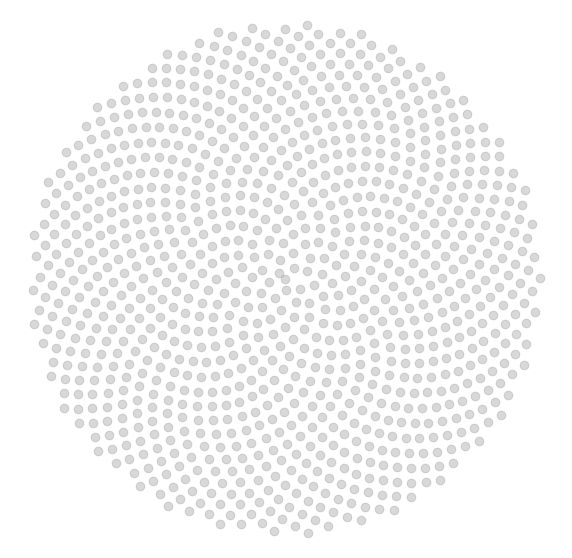

In [3]:
### ANSWER ###

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

plt.scatter(xlist, ylist, alpha=0.3, c="gray", s=75)
plt.axis('equal');
plt.axis('off');

___
## What a difference an angle makes!

You learned in the *The Algorithmic Beauty of Plants* chapter that you read that the packing of florets in a sunflower is extremely sensitive to the exact value of the golden angle. A little bit more or less and the beautifully-spaced arrangement that is readily apparent to the eye is destroyed. This is because of the special mathematical properties of the golden angle.

In this exercise, you will be taking the sunflower florets you just created using your `for` loop and creating an animation, where the value of the golden angle deviates from -1 to +1 degrees over 100 steps. Using this animation, you will observe the sensitivity of the packing of florets in a sunflower to the golden angle, and how this sensitivity varies closer to and farther from the center.

Our strategy will be to create a loop within a loop! The logic is this: you have already created a loop that will calculate all the `x` & `y` coordinates in a sunflower. You put that loop into another loop! The outer loop will iterate over deviations of the golden angle. So, the flow will look like this: 

1. Outer loop creates a new angle value, 
2. Inner loop caclulates all the `x` and `y` coordinate values for the new angle value, 
3. The inner loop is exited, you are back in the outer loop, 
4. Your previous code to plot a sunflower plots the florets for the current angle, 
5. The outer loop repeats with a new angle value and a new frame of the animation!

Just one more thing. We will be iterating in 100 steps from -1 to +1 degrees of the golden angle. How do you specify a set number of steps between two values? One function to do this is `linspace()`, from the `numpy` module. `linspace()` takes a start value (inclusive), stop value (inclusive), and a number of steps to incrementally iterate over the interval. Use this for your outer loop to minutely adjust the angle value from +- 1 degree of the golden angle!

In the cell below, pseudo-code is provided to help guide you in constructing your first loop of a loop! Remember, you can almost use the previous code (with some modifications) for your loop to calculate `x` and `y` coordinate values and to plot your sunflower in the loop of loops below.

This exercise is meant for you to spend time thinking about how complex loops work and how to modify and adjust code for different purposes. So spend time thinking through this. 

If you're successful, you will create a beautiful sunflower animation!

Follow the pseudo-code and fill out the missing parts!

In [11]:
# Imports to get the animation to work
from IPython.display import display, clear_output 
import time  

# Import numpy to use linspace
import numpy as np

# For animation, you need to call a figure
fig = plt.figure(figsize=(10,10)) 

# Using linspace() to create 100 increments between -1 and +1
for i in np.linspace(-1, 1, 100):
    
    # Here, create a "new_angle" variable that is golden_angle + i
    # Remember the new angle must be in radians!
    
    
    
    # This is where to insert your previous loop to calculate x and y coords for the new angle
    # Remember, theta will be calculated from your new angle! So be sure to change that!
    # Remember, properly indent your for loop within the other for loop: indents of indents!
    # Remember, keep the x and y coordinate lists outside of this loop (but within the first loop)
    # Still calculate x and y values for 1000 florets using your previous loop
    
    # Your previous loop code goes in this space!
    
    
    
    
    
    
    
    
    # You are now outside of the inner loop and back in the outer loops
    
    

    
    # Put your code for your plot of the sunflower here
    
    

    # This is the code that creates the animation
    time.sleep(0.1) 
    clear_output(wait=True)
    display(fig)
    fig.clear()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

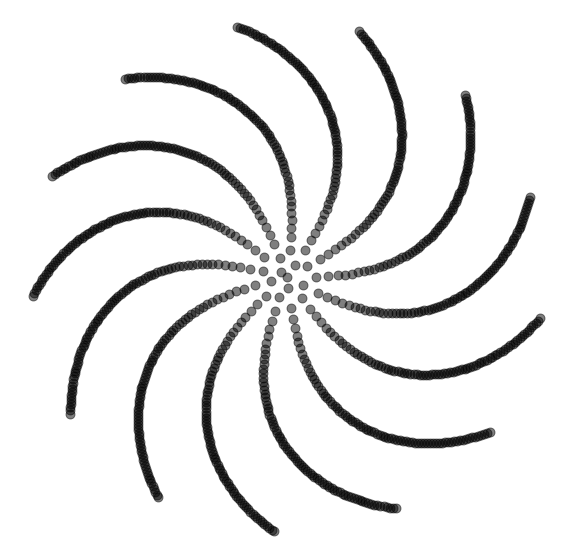

<Figure size 720x720 with 0 Axes>

In [4]:
### ANSWER ###

# Imports to get the animation to work
from IPython.display import display, clear_output 
import time  

# Import numpy to use linspace
import numpy as np

# For animation, you need to call a figure
fig = plt.figure(figsize=(10,10)) 

for i in np.linspace(-1, 1, 100):
    
    # Here, create a "new_angle" variable that is golden_angle + i
    # Next, remember to convert the new angle into radians!
    
    new_angle = golden_angle + i
    new_phi = new_angle * ( math.pi / 180.0 ) 
    
    # This is where to insert your previous loop to calculate x and y coords for the new angle
    # Remember, theta will be calculated from your new angle! So change that in your loop!
    # Rembmer, properly indent your for loop within the other for loop: indents of indents!

    xlist = []
    ylist = []

    for n in range (0, 1000): 
        
        r = math.sqrt(n) 
        theta = n * new_phi # Change angle

        x = r * math.cos(theta)
        y = r * math.sin(theta)

        xlist.append(x)
        ylist.append(y)

    
    # Put your code for your plot of the sunflower here
    plt.scatter(xlist, ylist, alpha=0.5, c="k", s=80)
    plt.axis('equal');
    plt.axis('off');
    

    # This is the code that creates the animation
    time.sleep(0.1);
    clear_output(wait=True);
    display(fig);
    fig.clear();

# Closes the figure animation once complete
#plt.close();

___
## But sunflowers grow!

Yes, it's nice to create an animation changing the angle of florets with a fixed radius. But in the real world a sunflower is growing! The florets arise from a meristem (a population of stem cells) at the center of the sunflower. At the periphery of the shoot apical meristem in the center of the sunflower, cells are determined to become a floret. We call the ability of cells, like meristems, to produce different types of tissues "pluripotent". We say that cells are "determined" or "fated" to become a particular type of tissue as they lose pluripotency. "Differentiated" cells have already become a particular tissue. After a floret has differentiated, it moves away from the center of the sunflower. 

In your previous plots, the florets at the periphery were the first to arise, and were "pushed" from the center by all the other florets that subsequently arose. Let's create an animation where we watch florets arise at the center and move outwards!

You will:

1. Create pre-populated lists of `thetas` and `radii`. Simply use the code you already have to calculate the thetas and radii.
2. Once born, a floret ***always*** keeps the same theta. But the radius gets longer and longer.
3. Our first loop will create lists of theta and radii that increase in length with each iteration. Because of this, we will start with one floret, then two, and so on, and with each additional floret, the radii of the first florets will become longer and longer. We will start with no florets and grow our sunflower, adding more and more. This loop takes one more member of your pre-specified `thetas` and `radii` lists with each iteration.
4. There is a problem, though. Each time we add more `thetas` (which are associated with unique florets), the oldest/first `thetas` are at the ***beginning*** of the list. The oldest `radii`, too, are at the beginning of their list and they will be the shortest radii! The oldest/first `thetas` should have the longest radii, not the shortest!
5. We will use the `.reverse()` function, which reverses the order of elements of a list. What this will do is insure that the oldest/first `thetas` of the thetas list correspond to the longest radii after the radii list is reversed.
6. Think through the reasoning above, it's complicated. We are adding one more floret with each iteration. But the first floret would always have the shortest radius, unless we reversed the radii list. By reversing the radii list, the first floret will have an increasing radius.

Follow the reasoning above and make sure you understand it. Pseudo-code with comments is provided in the cells below. Using the skeleton, fill out the rest of the code. The code is in two parts:

1. First, using a `for` loop, create two lists: `thetas` and `radii`. These lists should contain **750** theta and radius values for florets.

2. Using the pseudo-code provided, create an animation of a growing sunflower.

In [13]:
# In this cell, create two emtpy lists: "thetas" and "radii"
# Then, using a for loop, populate your two lists with theta and radii values for 750 florets
# You can use the code you have already produced
# Put your answer here




In [5]:
### ANSWER ###

thetas = []
radii = []

for n in range(750):

    r = math.sqrt(n) 
    theta = n * phi 
    
    thetas.append(theta)
    radii.append(r)

In [ ]:
# Next, using the pseudo-code below, create an animation of growing florets in a sunflower
# Pay attention to what the two loops are doing and how they function in real time
# Pay attention to indexing of lists
# Pay attention to the use of the .reverse() function
# Understand how this code creates an animation of a growing sunflower, frame-by-frame
# Put your answer below


# Imports to get the animation to work
from IPython.display import display, clear_output
import time  

# For animation, you need to call a figure
fig = plt.figure()

for i in range(len(radii)):

    xlist = []
    ylist = []
    
    # This selects the current set of thetas to use
    current_thetas = thetas[0:(i+1)]
    # This selects the current set of radii to use
    # Everytime the loop runs, this list will be recreated in the "forward" direction
    # When created, shortest radii are first, longest radii are last
    current_radii = radii[0:(i+1)]
    # After creating the list of radii, "reverse" its order
    # Reversing the order of the radii means that the 
    # florets first specified (the first thetas) have the longest radius
    # After reversing, longest radii are first, shortest radii are last
    current_radii.reverse()

    for n in range (i+1): 
        
        # Here, for each floret n caclulate r, theta, x, y, and append x & y to their lists

        
        
        
        
        
        
        
    # You are now back in the outer loop
    
    

    
    # Put your code to make a plot of a sunflower here
    
    
    
    # This is the code that creates the animation
    time.sleep(0.001) 
    clear_output(wait=True)
    display(fig)
    fig.clear()

# Closes the figure animation once complete
# plt.close()

KeyboardInterrupt: 

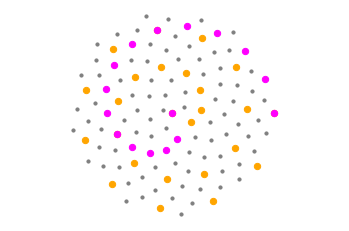

In [6]:
### ANSWER ###

# Imports to get the animation to work
from IPython.display import display, clear_output
import time

# For animation, you need to call a figure
fig = plt.figure()
#fig = plt.figure(facecolor='black')  # For a dark background

for i in range(len(radii)):

    xlist = []
    ylist = []
    
    # This selects the current set of thetas to use
    current_thetas = thetas[0:(i+1)]
    # This selects the current set of radii to use
    # Everytime the loop runs, this list will be recreated in the "forward" direction
    current_radii = radii[0:(i+1)]
    # After creating the list of radii, "reverse" its order
    # Reversing the order of the radii means that the 
    # florets first specified have the longest radius
    current_radii.reverse()

    for n in range (i+1): 
        
        # Here, for each floret n caclulate r, theta, x, y, and append x & y to their lists
        r = current_radii[n]
        theta = current_thetas[n]
                  
        x = r * math.cos(theta)
        y = r * math.sin(theta)
            
        xlist.append(x)
        ylist.append(y)
    
    # Put your code to make a plot of a sunflower here
    plt.scatter(xlist, ylist, c='gray', s=10)
    
    plt.scatter(xlist[0::5], ylist[0::5],c="orange", s=40) # Extra code for parastichies
    plt.scatter(xlist[0::8], ylist[0::8],c="magenta", s=40) # Extra code for parastichies
    
    plt.xlim(-30, 30) # Put maximum xlim values here
    plt.ylim(-30, 30) # Put maximum ylim values here
    plt.axis('off')
    plt.axis('equal')
    
    # If you want to save files to create a GIF
    # filename = "temp" + str(n) + ".jpg"
    # plt.savefig("./temp/" + filename)
    
    # This is the code that creates the animation
    time.sleep(0.001) 
    clear_output(wait=True)
    display(fig)
    fig.clear()

# Closes the figure animation once complete
# plt.close()